### Library import

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

### import dataset

In [2]:
salary = pd.read_csv("Salary_dataset.csv")
salary.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [4]:
# drop first column

salary = salary.drop(['Unnamed: 0'], axis =1)

In [5]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


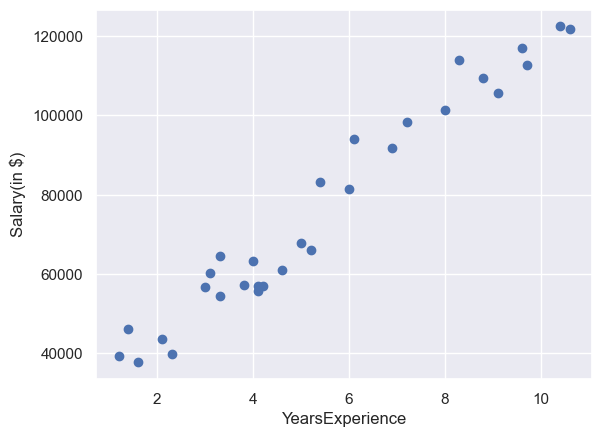

In [6]:
# scatter plot

plt.scatter(salary['YearsExperience'], salary['Salary'])
plt.xlabel("YearsExperience")
plt.ylabel("Salary(in $)")
plt.show()

In [7]:
# missing value checks

salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
salary.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


### Cheking for outlier

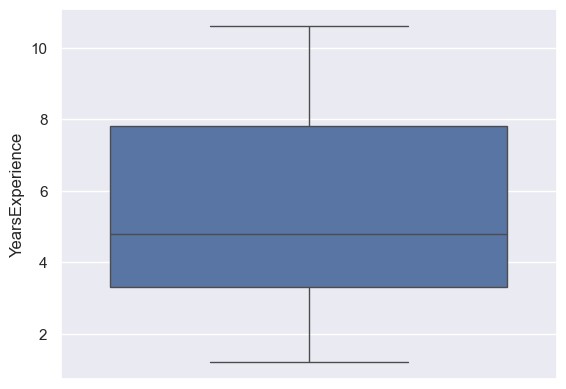

In [9]:
sns.boxplot(y= 'YearsExperience', data=salary)
plt.show()

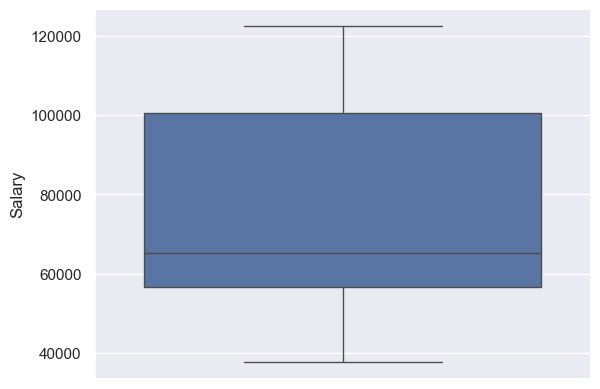

In [10]:
sns.boxplot(y= 'Salary', data=salary)
plt.show()

In [11]:
# split the data into dependent and independent variables

x = salary.iloc[:,0:1]
y = salary.iloc[:,-1]

In [12]:
# Independent variable

x

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [13]:
#Dependent variable

y

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64

In [14]:
# split the data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [15]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(22, 1) (8, 1) (22,) (8,)


### Building simple Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [17]:
x_test

,YearsExperience
20,6.9
24,8.8
7,3.3
18,6.0
2,1.6
27,9.7
26,9.6
16,5.2


### Prediction

In [18]:
salary_pred = linear.predict(x_test)
print(salary_pred)

[ 90499.22864751 108383.24981952  56613.71484793  82027.85019762
  40612.22222035 116854.62826941 115913.3639972   74497.73601993]


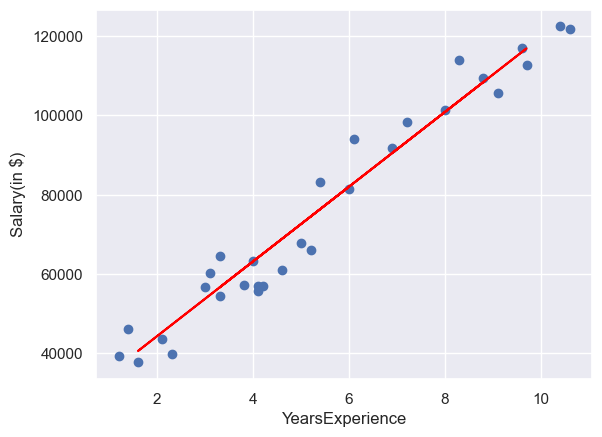

In [19]:
plt.scatter(salary['YearsExperience'], salary['Salary'])
plt.plot(x_test, salary_pred, color='red')
plt.xlabel("YearsExperience")
plt.ylabel("Salary(in $)")
plt.show()

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

In [21]:
print("Accuracy: ", r2_score(y_test, salary_pred))

Accuracy:  0.9820915410004406


In [22]:
mae= mean_absolute_error(y_test, salary_pred)
print(mae)

2717.9136363764055


In [23]:
mape= mean_absolute_percentage_error(y_test, salary_pred)
print(mape)

0.04026652383283284
